In [1]:
# Лев id=44
# Дима id=40
# Влад id=42

In [2]:
# !pip install ucimlrepo scikit-learn pandas matplotlib psutil

In [3]:
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, \
                                GridSearchCV, \
                                StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import psutil

import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 

In [4]:
# fetch dataset 
glass_identification = fetch_ucirepo(id=44) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features.fillna(0)
y = glass_identification.data.targets.fillna(0)
  
# metadata 
# print(glass_identification.metadata) 
  
# variable information 
# print(glass_identification.variables) 

In [5]:
data = pd.DataFrame(X)

In [6]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True,
                stratify=y)

In [7]:
y_test

,class
52,2.0
1,2.0
119,3.0
96,1.0
152,0.0
61,2.0
72,2.0
54,1.0
88,1.0
139,0.0


array([[<Axes: title={'center': 'class'}>]], dtype=object)

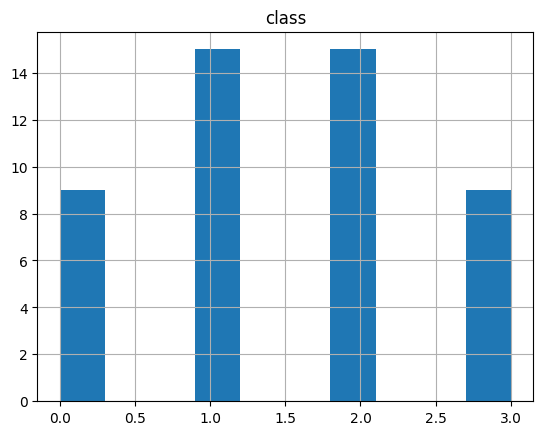

In [8]:
y_test.hist()

array([[<Axes: title={'center': 'class'}>]], dtype=object)

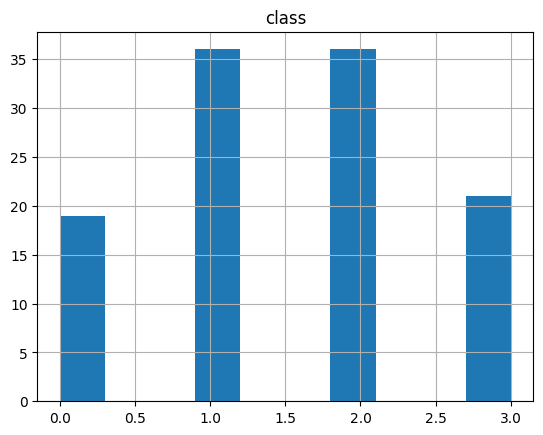

In [9]:
y_train.hist()

In [10]:
parameters = {'kernel':["linear", "poly", "rbf", "sigmoid"],
              'C': list(range(0, 100)),
             "degree": list(range(1, 10))}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train.values.ravel())

/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
144 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_param

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, ...],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [11]:
print(clf.best_estimator_)
print(clf.best_params_)

SVC(C=17, degree=1)
{'C': 17, 'degree': 1, 'kernel': 'rbf'}


In [12]:
y_pred = clf.best_estimator_.predict(X_test)
y_pred

array([2., 1., 0., 1., 1., 2., 1., 1., 1., 1., 0., 1., 1., 1., 2., 1., 2.,
       3., 2., 1., 1., 3., 2., 0., 2., 3., 3., 2., 2., 2., 2., 1., 2., 0.,
       0., 2., 0., 3., 2., 2., 2., 0., 3., 2., 1., 1., 1., 0.])

In [13]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.5208333333333334
Precision 0.5418198529411765
F1 0.5236213235294117
Accuracy 0.5208333333333334


In [14]:
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


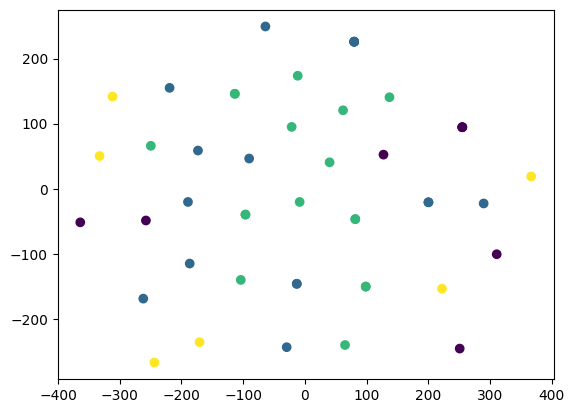

In [15]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')

/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


ValueError: 'c' argument has 48 elements, which is inconsistent with 'x' and 'y' with size 112.

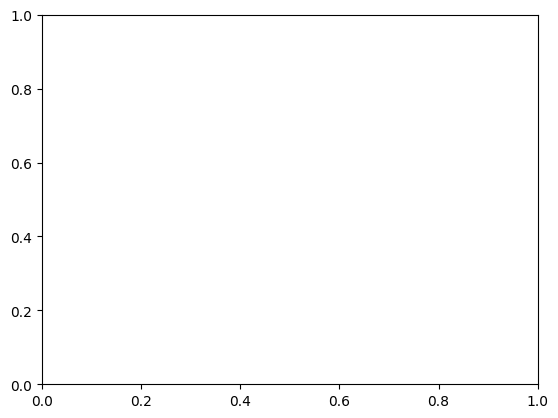

In [17]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_train)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')

In [18]:
X_tsne[:,1]

array([ 140.52858 ,  -20.35715 ,  -51.673927,  225.81267 ,   58.633026,
        -46.732254, -114.989685, -146.1124  , -243.47104 ,  154.8957  ,
         94.4532  , -168.87509 ,  225.81267 , -146.1124  , -150.38512 ,
        -20.853838,  -39.77969 ,   18.794401,  173.51642 ,  -20.853838,
        249.21109 , -153.61865 ,  145.7974  , -100.68486 ,  120.479225,
         50.177322, -235.81541 , -150.38512 ,  -20.364628,  145.7974  ,
         65.89815 ,  225.81267 ,   40.55593 , -245.6107  ,  -48.817104,
        -39.77969 ,   52.315144,  141.55305 ,  -46.732254, -240.1188  ,
         94.960754,   94.4532  , -266.9652  , -140.15393 ,   46.347317,
        225.81267 ,  -22.675617,   94.4532  ], dtype=float32)

In [19]:
### KNN

parameters = {'n_neighbors': list(range(3, 100)),
             "weights": ["uniform", "distance"],
             "algorithm":['ball_tree', 'kd_tree', 'brute', #'auto'
                         ]}
knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn, parameters, cv=4, n_jobs=psutil.cpu_count(logical=False))
knn_clf.fit(X_train, y_train.values.ravel())

/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "/Users/lev/.pyenv/versions/3.11

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=11,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']})

In [20]:
print(knn_clf.best_estimator_)
print(knn_clf.best_params_)

KNeighborsClassifier(algorithm='kd_tree', weights='distance')
{'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance'}


In [21]:
y_pred = knn_clf.best_estimator_.predict(X_test)
y_pred

array([2., 1., 0., 2., 1., 2., 1., 1., 1., 1., 0., 1., 2., 1., 2., 1., 2.,
       1., 2., 1., 1., 3., 2., 1., 2., 1., 3., 2., 2., 2., 1., 2., 2., 0.,
       0., 2., 0., 1., 2., 1., 2., 0., 3., 2., 1., 2., 1., 0.])

In [22]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.3541666666666667
Precision 0.4177631578947369
F1 0.35110294117647056
Accuracy 0.3541666666666667


/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


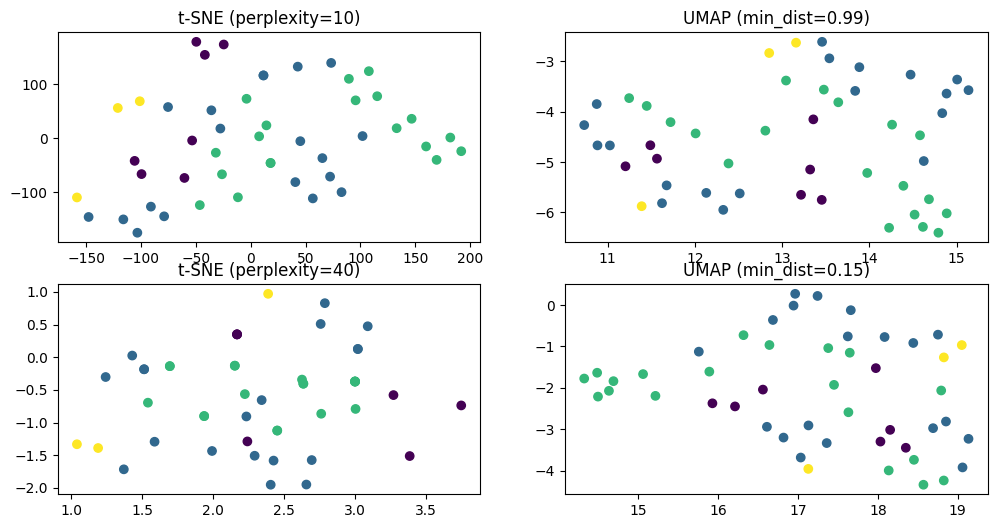

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=10)')

plt.subplot(2, 2, 2)
umap_model = umap.UMAP(n_components=2, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.99)')

plt.subplot(2, 2, 3)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=40)')

plt.subplot(2, 2, 4)
umap_model = umap.UMAP(n_components=2, min_dist=0.15, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.15)')

plt.show()

In [24]:
### RF

parameters = {"n_estimators": list(range(10, 100, 10)),
             "criterion": ["gini", "entropy", "log_loss"],
             "max_depth": list(range(2, 15)),
              "max_features": ["sqrt", "log2", None]
             }
rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, parameters, cv=4, n_jobs=psutil.cpu_count(logical=False))
rf_clf.fit(X_train, y_train.values.ravel())

/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=11,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

In [25]:
print(rf_clf.best_estimator_)
print(rf_clf.best_params_)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=None,
                       n_estimators=20)
{'criterion': 'entropy', 'max_depth': 14, 'max_features': None, 'n_estimators': 20}


In [26]:
y_pred = rf_clf.best_estimator_.predict(X_test)
y_pred

array([2., 2., 3., 1., 1., 2., 1., 1., 1., 1., 0., 3., 1., 1., 2., 1., 2.,
       3., 2., 1., 1., 3., 2., 0., 2., 3., 3., 2., 0., 2., 2., 1., 2., 3.,
       0., 2., 0., 3., 2., 2., 0., 0., 3., 2., 1., 1., 1., 0.])

In [27]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.6458333333333334
Precision 0.640625
F1 0.6427893738140417
Accuracy 0.6458333333333334


/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


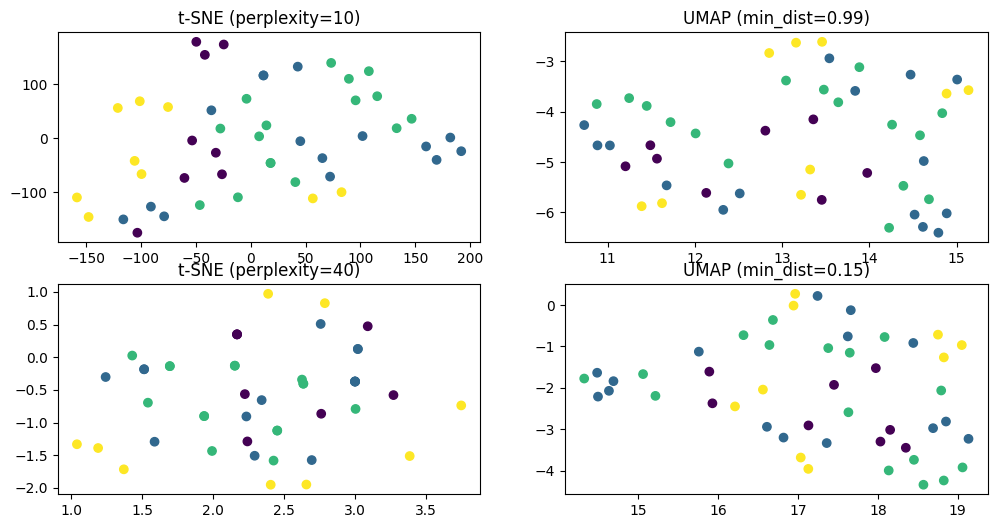

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=10)')

plt.subplot(2, 2, 2)
umap_model = umap.UMAP(n_components=2, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.99)')

plt.subplot(2, 2, 3)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=40)')

plt.subplot(2, 2, 4)
umap_model = umap.UMAP(n_components=2, min_dist=0.15, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.15)')

plt.show()

In [29]:
clf.best_estimator_.predict(X_test)
knn_clf.best_estimator_.predict(X_test)
rf_clf.best_estimator_.predict(X_test)

array([2., 2., 3., 1., 1., 2., 1., 1., 1., 1., 0., 3., 1., 1., 2., 1., 2.,
       3., 2., 1., 1., 3., 2., 0., 2., 3., 3., 2., 0., 2., 2., 1., 2., 3.,
       0., 2., 0., 3., 2., 2., 0., 0., 3., 2., 1., 1., 1., 0.])

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# Создаем объект SMOTE
smote = SMOTE(random_state=42)

# Ресемплируем тестовые данные
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Делаем предсказания без SMOTE
y_pred_clf = clf.best_estimator_.predict(X_test)
y_pred_knn_clf = knn_clf.best_estimator_.predict(X_test)
y_pred_rf_clf = rf_clf.best_estimator_.predict(X_test)

clf_smote = clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)
knn_clf_smote = knn_clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)
rf_clf_smote = rf_clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)

# Делаем предсказания с SMOTE
y_pred_clf_smote = clf_smote.predict(X_test)
y_pred_knn_clf_smote = knn_clf_smote.predict(X_test)
y_pred_rf_clf_smote = rf_clf_smote.predict(X_test)

# Выводим F1-меры для всех вариантов
print("F1-меры без SMOTE:")
print("clf:", f1_score(y_test, y_pred_clf, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf, average='macro'))

print("\nF1-меры с SMOTE:")
print("clf:", f1_score(y_test, y_pred_clf_smote, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf_smote, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf_smote, average='macro'))

F1-меры без SMOTE:
clf: 0.5106617647058824
knn_clf: 0.33088235294117646
rf_clf: 0.6495256166982922

F1-меры с SMOTE:
clf: 0.49595959595959593
knn_clf: 0.3363252771397184
rf_clf: 0.5782772904483431


/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [36]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE


# Создаем объекты SMOTE
smote = SMOTE(random_state=42)
borderline_smote = BorderlineSMOTE(random_state=42)
borderline_smote2 = SVMSMOTE(random_state=42)

clf.best_estimator_.fit(X=X_train, y=y_train)
knn_clf.best_estimator_.fit(X=X_train, y=y_train)
rf_clf.best_estimator_.fit(X=X_train, y=y_train)

# Делаем предсказания без SMOTE
y_pred_clf = clf.best_estimator_.predict(X_test)
y_pred_knn_clf = knn_clf.best_estimator_.predict(X_test)
y_pred_rf_clf = rf_clf.best_estimator_.predict(X_test)
# Выводим F1-меры для всех вариантов
print("F1-меры без SMOTE:")
f1_clf = f1_score(y_test, y_pred_clf, average='macro')
print("clf:", f1_clf)
knn_clf_score = f1_score(y_test, y_pred_knn_clf, average='macro')
print("knn_clf:", knn_clf_score)
rf_clf_score = f1_score(y_test, y_pred_rf_clf, average='macro')
print("rf_clf:", rf_clf_score)


# Ресемплируем тестовые данные
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train, y_train)
X_train_borderline_smote2, y_train_borderline_smote2 = borderline_smote2.fit_resample(X_train, y_train)

clf_smote = clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)
knn_clf_smote = knn_clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)
rf_clf_smote = rf_clf.best_estimator_.fit(X=X_train_smote, y=y_train_smote)

# Делаем предсказания с SMOTE
y_pred_clf_smote = clf_smote.predict(X_test)
y_pred_knn_clf_smote = knn_clf_smote.predict(X_test)
y_pred_rf_clf_smote = rf_clf_smote.predict(X_test)

print("\nF1-меры с SMOTE:")
print("clf:", f1_score(y_test, y_pred_clf_smote, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf_smote, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf_smote, average='macro'))

clf_borderline_smote = clf.best_estimator_.fit(X=X_train_borderline_smote, y=y_train_borderline_smote)
knn_clf_borderline_smote = knn_clf.best_estimator_.fit(X=X_train_borderline_smote, y=y_train_borderline_smote)
rf_clf_borderline_smote = rf_clf.best_estimator_.fit(X=X_train_borderline_smote, y=y_train_borderline_smote)

# Делаем предсказания с Borderline-SMOTE
y_pred_clf_borderline_smote = clf_borderline_smote.predict(X_test)
y_pred_knn_clf_borderline_smote = knn_clf_borderline_smote.predict(X_test)
y_pred_rf_clf_borderline_smote = rf_clf_borderline_smote.predict(X_test)

print("\nF1-меры с Borderline-SMOTE:")
print("clf:", f1_score(y_test, y_pred_clf_borderline_smote, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf_borderline_smote, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf_borderline_smote, average='macro'))

clf_borderline_smote2 = clf.best_estimator_.fit(X=X_train_borderline_smote2, y=y_train_borderline_smote2)
knn_clf_borderline_smote2 = knn_clf.best_estimator_.fit(X=X_train_borderline_smote2, y=y_train_borderline_smote2)
rf_clf_borderline_smote2 = rf_clf.best_estimator_.fit(X=X_train_borderline_smote2, y=y_train_borderline_smote2)

# Делаем предсказания с Borderline-SMOTE2
y_pred_clf_borderline_smote2 = clf_borderline_smote2.predict(X_test)
y_pred_knn_clf_borderline_smote2 = knn_clf_borderline_smote2.predict(X_test)
y_pred_rf_clf_borderline_smote2 = rf_clf_borderline_smote2.predict(X_test)

print("\nF1-меры с Borderline-SMOTE2:")
print("clf:", f1_score(y_test, y_pred_clf_borderline_smote2, average='macro'))
print("knn_clf:", f1_score(y_test, y_pred_knn_clf_borderline_smote2, average='macro'))
print("rf_clf:", f1_score(y_test, y_pred_rf_clf_borderline_smote2, average='macro'))


F1-меры без SMOTE:
clf: 0.5106617647058824
knn_clf: 0.33088235294117646
rf_clf: 0.6333965844402277

F1-меры с SMOTE:
clf: 0.49595959595959593
knn_clf: 0.3363252771397184
rf_clf: 0.6661922833649588

F1-меры с Borderline-SMOTE:
clf: 0.5019396551724138
knn_clf: 0.3723214285714286
rf_clf: 0.6366995073891626

F1-меры с Borderline-SMOTE2:
clf: 0.549573055028463
knn_clf: 0.396218487394958
rf_clf: 0.619187565308255


/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y

/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


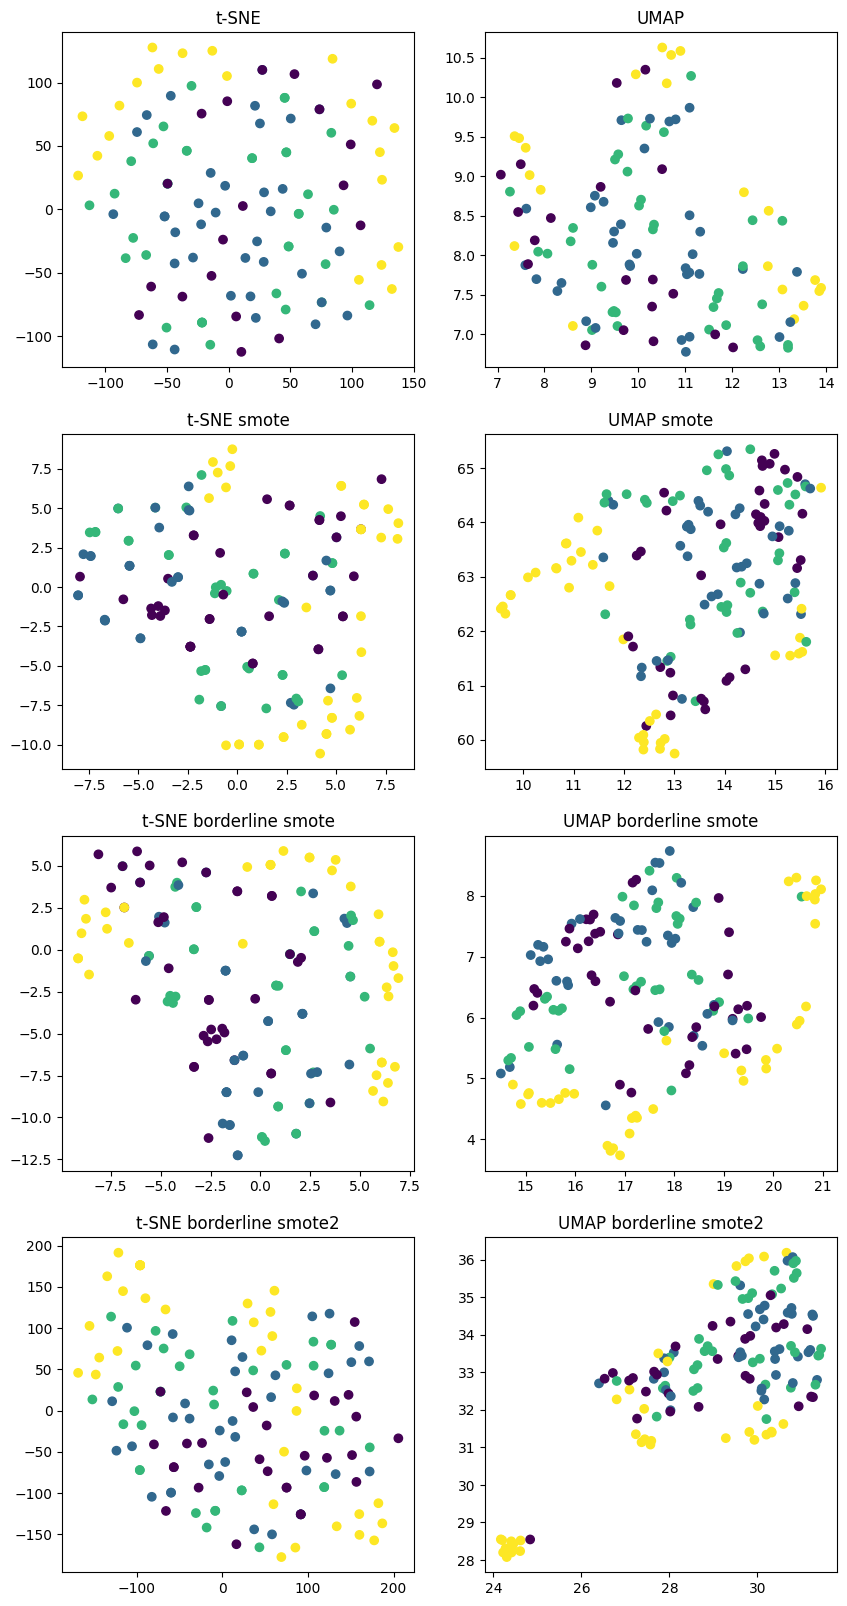

In [37]:
# Применяем t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_train)
X_test_smote_tsne = tsne.fit_transform(X_train_smote)
X_test_borderline_smote_tsne = tsne.fit_transform(X_train_borderline_smote)
X_test_borderline_smote2_tsne = tsne.fit_transform(X_train_borderline_smote2)

# Применяем UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_test_umap = umap_model.fit_transform(X_train)
X_test_smote_umap = umap_model.fit_transform(X_train_smote)
X_test_borderline_smote_umap = umap_model.fit_transform(X_train_borderline_smote)
X_test_borderline_smote2_umap = umap_model.fit_transform(X_train_borderline_smote2)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))

plt.subplot(4, 2, 1)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_train["class"], cmap='viridis')
plt.title("t-SNE")

plt.subplot(4, 2, 2)
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_train["class"], cmap='viridis')
plt.title("UMAP")

plt.subplot(4, 2, 3)
plt.scatter(X_test_smote_tsne[:, 0], X_test_smote_tsne[:, 1], c=y_train_smote["class"], cmap='viridis')
plt.title("t-SNE smote")

plt.subplot(4, 2, 4)
plt.scatter(X_test_smote_umap[:, 0], X_test_smote_umap[:, 1], c=y_train_smote["class"], cmap='viridis')
plt.title("UMAP smote")

plt.subplot(4, 2, 5)
plt.scatter(X_test_borderline_smote_tsne[:, 0], X_test_borderline_smote_tsne[:, 1], c=y_train_borderline_smote["class"], cmap='viridis')
plt.title("t-SNE borderline smote")

plt.subplot(4, 2, 6)
plt.scatter(X_test_borderline_smote_umap[:, 0], X_test_borderline_smote_umap[:, 1], c=y_train_borderline_smote["class"], cmap='viridis')
plt.title("UMAP borderline smote")

plt.subplot(4, 2, 7)
plt.scatter(X_test_borderline_smote2_tsne[:, 0], X_test_borderline_smote2_tsne[:, 1], c=y_train_borderline_smote2["class"], cmap='viridis')
plt.title("t-SNE borderline smote2")

plt.subplot(4, 2, 8)
plt.scatter(X_test_borderline_smote2_umap[:, 0], X_test_borderline_smote2_umap[:, 1], c=y_train_borderline_smote2["class"], cmap='viridis')
plt.title("UMAP borderline smote2")

plt.show()

In [40]:
pip install trimap

Note: you may need to restart the kernel to use updated packages.


In [51]:
X_train.iloc[:, :3].values

array([[2, 2, 1],
       [3, 1, 3],
       [1, 2, 1],
       [3, 1, 2],
       [1, 3, 2],
       [1, 2, 1],
       [2, 1, 1],
       [1, 3, 1],
       [3, 1, 2],
       [3, 3, 2],
       [3, 1, 2],
       [2, 1, 1],
       [1, 3, 2],
       [1, 2, 4],
       [1, 1, 1],
       [3, 1, 4],
       [1, 2, 1],
       [1, 2, 1],
       [3, 3, 3],
       [2, 3, 2],
       [3, 1, 1],
       [2, 2, 1],
       [3, 2, 2],
       [3, 3, 2],
       [1, 1, 1],
       [2, 1, 2],
       [1, 1, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 4],
       [2, 3, 1],
       [1, 1, 3],
       [3, 4, 1],
       [3, 3, 3],
       [1, 1, 1],
       [2, 2, 1],
       [3, 3, 2],
       [2, 2, 1],
       [1, 1, 2],
       [2, 1, 3],
       [3, 3, 1],
       [3, 2, 1],
       [3, 1, 1],
       [3, 3, 1],
       [3, 1, 2],
       [3, 1, 1],
       [1, 2, 3],
       [3, 1, 2],
       [1, 2, 2],
       [1, 1, 3],
       [3, 3, 1],
       [2, 2, 4],
       [1, 1, 2],
       [2, 1, 1],
       [2, 3, 3],
       [1,

/Users/lev/.pyenv/versions/3.11.10/lib/python3.11/site-packages/pacmap/pacmap.py:822: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


Text(0.5, 1.0, 'trimap borderline-smote2')

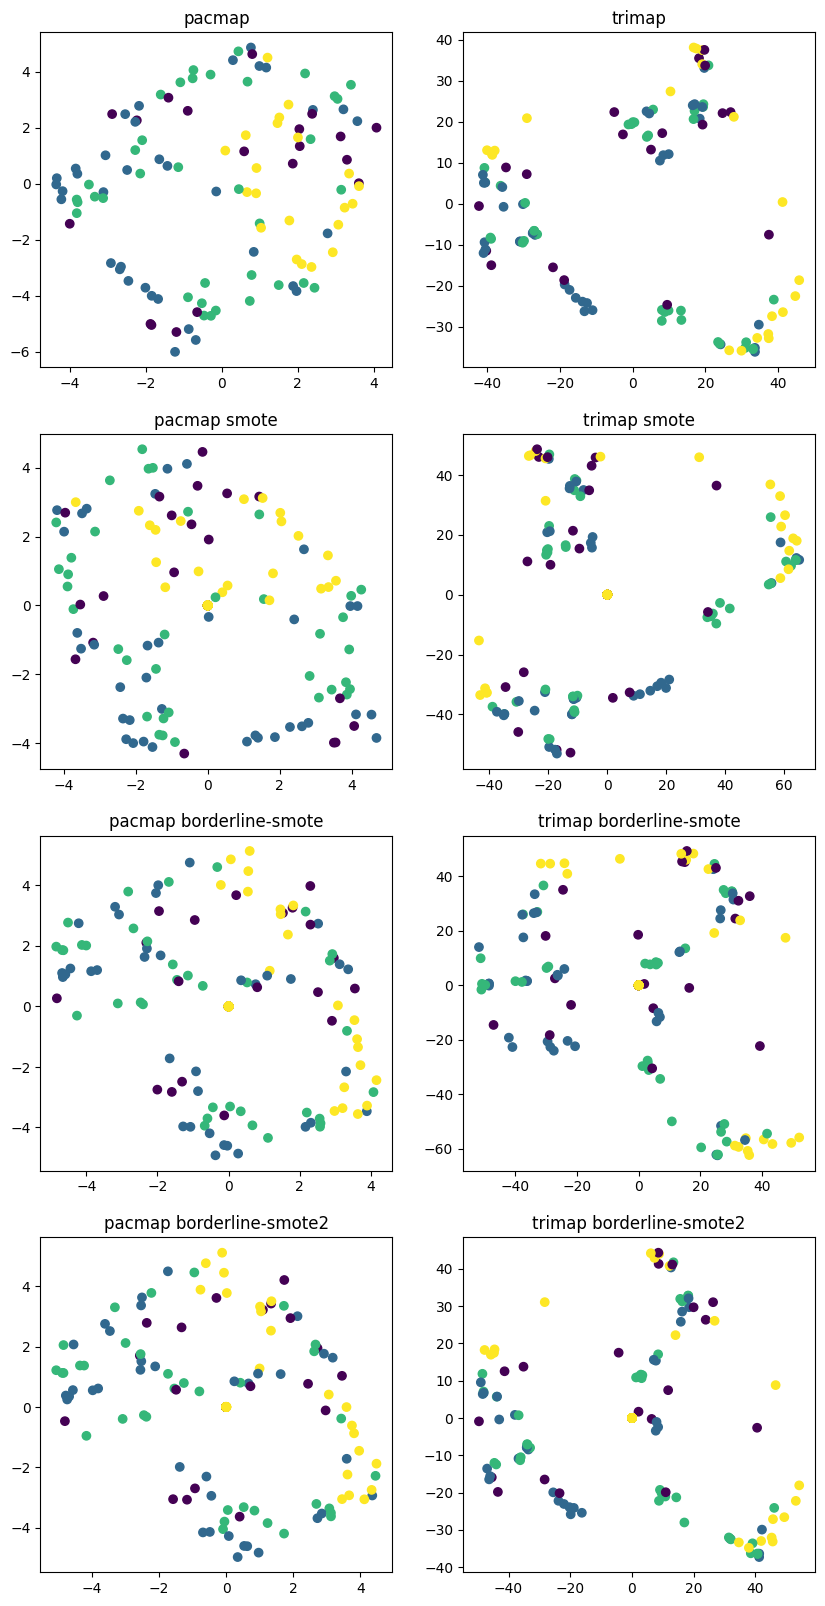

In [66]:
import pacmap
import trimap
plt.figure(figsize=(10, 20))

# Применяем pacmap
pacmap_model = pacmap.PaCMAP(n_components=2, random_state=42)
X_test_pacmap = pacmap_model.fit_transform(X_train)
X_test_smote_pacmap = pacmap_model.fit_transform(X_train_smote)
X_test_borderline_smote_pacmap = pacmap_model.fit_transform(X_train_borderline_smote)
X_test_borderline_smote2_pacmap = pacmap_model.fit_transform(X_train_borderline_smote2)

# Применяем trimap
trimap_model = trimap.TRIMAP()
X_test_trimap = trimap_model.fit_transform(X_train.iloc[:, :].values)
X_test_smote_trimap = trimap_model.fit_transform(X_train_smote)
X_test_borderline_smote_trimap = trimap_model.fit_transform(X_train_borderline_smote)
X_test_borderline_smote2_trimap = trimap_model.fit_transform(X_train_borderline_smote2)

plt.subplot(4, 2, 1)
plt.scatter(X_test_pacmap[:, 0], X_test_pacmap[:, 1], c=y_train["class"], cmap='viridis')
plt.title("pacmap")

plt.subplot(4, 2, 2)
plt.scatter(X_test_trimap[:, 0], X_test_trimap[:, 1], c=y_train["class"], cmap='viridis')
plt.title("trimap")

plt.subplot(4, 2, 3)
plt.scatter(X_test_smote_pacmap[:, 0], X_test_smote_pacmap[:, 1], c=y_train_smote["class"], cmap='viridis')
plt.title("pacmap smote")

plt.subplot(4, 2, 4)
plt.scatter(X_test_smote_trimap[:, 0], X_test_smote_trimap[:, 1], c=y_train_smote["class"], cmap='viridis')
plt.title("trimap smote")

plt.subplot(4, 2, 5)
plt.scatter(X_test_borderline_smote_pacmap[:, 0], X_test_borderline_smote_pacmap[:, 1], c=y_train_borderline_smote["class"], cmap='viridis')
plt.title("pacmap borderline-smote")

plt.subplot(4, 2, 6)
plt.scatter(X_test_borderline_smote_trimap[:, 0], X_test_borderline_smote_trimap[:, 1], c=y_train_borderline_smote["class"], cmap='viridis')
plt.title("trimap borderline-smote")

plt.subplot(4, 2, 7)
plt.scatter(X_test_borderline_smote2_pacmap[:, 0], X_test_borderline_smote2_pacmap[:, 1], c=y_train_borderline_smote2["class"], cmap='viridis')
plt.title("pacmap borderline-smote2")

plt.subplot(4, 2, 8)
plt.scatter(X_test_borderline_smote2_trimap[:, 0], X_test_borderline_smote2_trimap[:, 1], c=y_train_borderline_smote2["class"], cmap='viridis')
plt.title("trimap borderline-smote2")


